## **0.0** Set Up

In [ ]:
# import packages
import json
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.model_selection import train_test_split
from collections import Counter

## **1.0** EDA & Data Prep

### application_data.csv

In [8]:
df_application = pd.read_csv('application_data.csv')
df_application.head()

FileNotFoundError: [Errno 2] No such file or directory: 'application_data.csv'

### Initial Data Cleaning

#### 1. Check Nulls and Duplicates - Overall

In [ ]:
print("Number of rows:", df_application.shape[0])
print("Number of columns:", df_application.shape[1])
num_dups = df_application.duplicated().sum()
print("Number of duplicate rows:", num_dups)
num_nulls = df_application.isnull().any(axis=1).sum()
print("Number of rows with null values:", num_nulls)

Number of rows: 182487
Number of columns: 122
Number of duplicate rows: 0
Number of rows with null values: 177406


#### 2. Check target variable

In [ ]:
df_application['TARGET'].value_counts()

,count
TARGET,
0,167655
1,14832


#### 3. Drop Columns with Missing rate >20%

In [ ]:
#check missing percentage
na_percentage = (df_application.isna().sum() / len(df_application)) * 100
na_percentage_df = na_percentage.to_frame(name='NaN_Percentage').sort_values(by='NaN_Percentage', ascending=False)
na_percentage_df2 = na_percentage_df.loc[na_percentage_df['NaN_Percentage'] >20]
na_percentage_df2.shape

(50, 1)

In [ ]:
#na_percentage_df2.head(10)

In [ ]:
df_application_clean = df_application.drop(na_percentage_df2.index, axis=1)
df_application_clean.shape

(182487, 72)

#### 4. Drop Rows with N/A value

In [ ]:
df_application_clean= df_application_clean.dropna()
df_application_clean.shape

(144966, 72)

In [ ]:
df_application_clean['TARGET'].value_counts()

,count
TARGET,
0,133546
1,11420


### Check & Process Data by Types

In [ ]:
dtype_df = pd.DataFrame(df_application_clean.dtypes, columns=['DataType']).reset_index()
dtype_df.columns = ['ColumnName', 'DataType']
dtype_df['DataType'].value_counts()

,count
DataType,
float64,58
object,11
int64,3


### A. Flag (Boolean) Variables

In [ ]:
flag_columns = [col for col in df_application_clean.columns if set(df_application_clean[col].unique()) <= {0, 1} or set(df_application_clean[col].unique()) <= {'Y', 'N'}]
flag_columns.remove('TARGET')
print(flag_columns)
# Convert identified flag columns to numeric 0 and 1
for col in flag_columns:
    df_application_clean[col] = df_application_clean[col].replace({'Y': 1, 'N': 0}).astype(int)


['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


<ipython-input-11-0a40fceeb62d>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_application_clean[col] = df_application_clean[col].replace({'Y': 1, 'N': 0}).astype(int)
<ipython-input-11-0a40fceeb62d>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_application_clean[col] = df_application_clean[col].replace({'Y': 1, 'N': 0}).astype(int)


In [ ]:
df_application_clean.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,0,1,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,1,1,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,1,1,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### B. Categorical Variables

In [ ]:
non_numeric_df = df_application_clean.select_dtypes(exclude='number')

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

unique_values_df = pd.DataFrame({col: [non_numeric_df[col].unique()] for col in non_numeric_df.columns}).transpose()
unique_values_df.columns = ['UniqueValues']
unique_values_df = unique_values_df.reset_index().rename(columns={'index': 'ColumnName'})
unique_values_df

,ColumnName,UniqueValues
0,NAME_CONTRACT_TYPE,"[Cash loans, Revolving loans]"
1,CODE_GENDER,"[M, F, XNA]"
2,NAME_TYPE_SUITE,"[Unaccompanied, Spouse, partner, Children, Family, Other_A, Other_B, Group of people]"
3,NAME_INCOME_TYPE,"[Working, State servant, Commercial associate, Pensioner, Unemployed, Student, Businessman]"
4,NAME_EDUCATION_TYPE,"[Secondary / secondary special, Higher education, Incomplete higher, Lower secondary, Academic degree]"
5,NAME_FAMILY_STATUS,"[Single / not married, Married, Widow, Civil marriage, Separated]"
6,NAME_HOUSING_TYPE,"[House / apartment, Rented apartment, Municipal apartment, With parents, Office apartment, Co-op apartment]"
7,WEEKDAY_APPR_PROCESS_START,"[WEDNESDAY, MONDAY, SUNDAY, SATURDAY, FRIDAY, THURSDAY, TUESDAY]"
8,ORGANIZATION_TYPE,"[Business Entity Type 3, Government, Other, XNA, Medicine, Business Entity Type 2, Self-employed, Housing, Kindergarten, Trade: type 7, Industry: type 11, Military, Transport: type 4, School, Services, Emergency, Security, Trade: type 2, University, Police, Construction, Business Entity Type 1, Industry: type 4, Agriculture, Restaurant, Transport: type 2, Hotel, Industry: type 7, Trade: type 3, Industry: type 3, Bank, Industry: type 9, Postal, Trade: type 6, Industry: type 2, Transport: type 1, Transport: type 3, Electricity, Industry: type 12, Insurance, Industry: type 1, Security Ministries, Mobile, Trade: type 1, Industry: type 5, Industry: type 10, Legal Services, Advertising, Trade: type 5, Cleaning, Industry: type 13, Industry: type 8, Realtor, Culture, Telecom, Religion, Industry: type 6, Trade: type 4]"


In [ ]:
# Check domain value with 'XNA'
non_numeric_df['CODE_GENDER'].value_counts()

,count
CODE_GENDER,
F,96122
M,48841
XNA,3


In [ ]:
#Delete XNA for CODE_GENDER
df_application_clean2 = df_application_clean.drop(df_application_clean[df_application_clean['CODE_GENDER'] == 'XNA'].index)
df_application_clean2.reset_index(drop=True, inplace=True)
df_application_clean2.shape

(144963, 72)

In [ ]:
non_numeric_df['ORGANIZATION_TYPE'].value_counts()

,count
ORGANIZATION_TYPE,
Business Entity Type 3,31851
XNA,25990
Self-employed,16750
Other,7911
Medicine,5599
Business Entity Type 2,5276
Government,5098
School,4492
Trade: type 7,3464


In [ ]:
check = df_application_clean2[['SK_ID_CURR','TARGET','ORGANIZATION_TYPE']].groupby(['ORGANIZATION_TYPE','TARGET']).count()
check.loc[['Other','XNA']]

SK_ID_CURR
ORGANIZATION_TYPE TARGET            
Other             0             7305
                  1              606
XNA               0            24642
                  1             1348

In [ ]:
#Group XNA with Other
df_application_clean2['ORGANIZATION_TYPE'] = df_application_clean2['ORGANIZATION_TYPE'].replace('XNA', 'Other')

In [ ]:
check = df_application_clean2[['SK_ID_CURR','TARGET','ORGANIZATION_TYPE']].groupby(['ORGANIZATION_TYPE','TARGET']).count()
check.loc[['Other']]

SK_ID_CURR
ORGANIZATION_TYPE TARGET            
Other             0            31947
                  1             1954

In [ ]:
#One hot encoding
non_numeric_columns = df_application_clean2.select_dtypes(exclude='number').columns
encoded_application_clean = pd.get_dummies(df_application_clean2, columns=non_numeric_columns)

In [ ]:
encoded_application_clean.head()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade:

### C.Numerical Variables

In [ ]:
numeric_columns= df_application_clean2.select_dtypes(include='number').columns
numeric_columns = numeric_columns.drop(['SK_ID_CURR','TARGET'])
numeric_columns = numeric_columns.drop(flag_columns)
numerical_summary = encoded_application_clean[numeric_columns].describe()
display(numerical_summary)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,144963.000000,1.449630e+05,1.449630e+05,144963.000000,1.449630e+05,144963.000000,144963.000000,144963.000000,144963.000000,144963.000000,144963.000000,144963.000000,144963.000000,144963.000000,144963.000000,144963.000000,144963.000000,144963.000000,144963.000000,144963.000000,144963.000000,144963.000000,144963.000000,144963.000000,144963.000000,144963.000000,144963.000000
mean,0.425826,1.720749e+05,6.089396e+05,27219.692773,5.470395e+05,0.020770,-16124.845816,63452.493036,-4981.073812,-3053.138732,2.169678,2.054980,2.035147,12.104551,0.518115,0.510527,1.437491,0.144485,1.420763,0.100053,-995.601519,0.006533,0.007188,0.034119,0.275360,0.263916,1.894718
std,0.728680,3.238062e+05,4.053177e+05,14391.743660,3.719257e+05,0.013704,4302.232640,141070.763789,3522.896863,1489.637630,0.913082,0.503487,0.497825,3.244847,0.189334,0.194853,2.489728,0.450995,2.468273,0.364094,833.700312,0.085947,0.114018,0.203806,0.935915,0.608555,1.857797
min,0.000000,2.700000e+04,4.500000e+04,1980.000000,4.500000e+04,0.000533,-25201.000000,-17531.000000,-22701.000000,-7197.000000,1.000000,1.000000,1.000000,0.000000,0.000001,0.000527,0.000000,0.000000,0.000000,0.000000,-4185.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.125000e+05,2.745000e+05,16713.000000,2.385000e+05,0.010006,-19719.000000,-2879.000000,-7473.000000,-4322.000000,2.000000,2.000000,2.000000,10.000000,0.399568,0.370650,0.000000,0.000000,0.000000,0.000000,-1611.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.575000e+05,5.212800e+05,25060.500000,4.500000e+05,0.018850,-15812.000000,-1285.000000,-4498.000000,-3340.000000,2.000000,2.000000,2.000000,12.000000,0.569830,0.535276,0.000000,0.000000,0.000000,0.000000,-810.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,2.025000e+05,8.140410e+05,34785.000000,6.885000e+05,0.028663,-12584.000000,-307.000000,-1994.000000,-1820.000000,3.000000,2.000000,2.000000,14.000000,0.665431,0.669057,2.000000,0.000000,2.000000,0.000000,-291.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,14.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7676.000000,365243.000000,0.000000,0.000000,15.000000,3.000000,3.000000,23.000000,0.855000,0.896010,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,24.000000,8.000000,23.000000


In [ ]:
# standardize
from sklearn.preprocessing import StandardScaler
encoded_application_clean_std = encoded_application_clean.copy()
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(encoded_application_clean[numeric_columns])



### After Standardization ###
Total Variance: 27.0002
Skewness:
CNT_CHILDREN                     1.873205
AMT_INCOME_TOTAL               324.340646
AMT_CREDIT                       1.204805
AMT_ANNUITY                      1.582502
AMT_GOODS_PRICE                  1.317655
REGION_POPULATION_RELATIVE       1.487478
DAYS_BIRTH                      -0.115303
DAYS_EMPLOYED                    1.671228
DAYS_REGISTRATION               -0.591161
DAYS_ID_PUBLISH                  0.391139
CNT_FAM_MEMBERS                  0.953241
REGION_RATING_CLIENT             0.101869
REGION_RATING_CLIENT_W_CITY      0.072724
HOUR_APPR_PROCESS_START         -0.018860
EXT_SOURCE_2                    -0.817838
EXT_SOURCE_3                    -0.409899
OBS_30_CNT_SOCIAL_CIRCLE        20.683599
DEF_30_CNT_SOCIAL_CIRCLE         6.515049
OBS_60_CNT_SOCIAL_CIRCLE        20.534760
DEF_60_CNT_SOCIAL_CIRCLE         6.163851
DAYS_LAST_PHONE_CHANGE          -0.644900
AMT_REQ_CREDIT_BUREAU_HOUR      15.016115
AMT_REQ_CRE

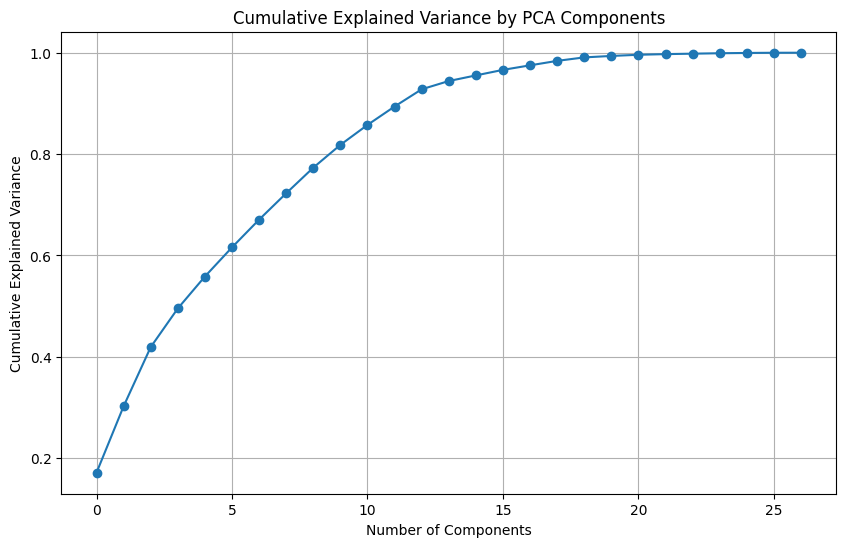

Optimal number of PCA components to retain 95% variance: 15


In [ ]:
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 1: Calculate Statistics Before and After Standardization
def calculate_statistics(data, label):
    variance = data.var().sum()
    skewness = data.apply(lambda x: skew(x))
    kurtosis_values = data.apply(lambda x: kurtosis(x))
    print(f"\n### {label} ###")
    print(f"Total Variance: {variance:.4f}")
    print(f"Skewness:\n{skewness}")
    print(f"Kurtosis:\n{kurtosis_values}")
    return variance, skewness, kurtosis_values

# Calculate statistics before standardization
variance_before, skewness_before, kurtosis_before = calculate_statistics(
    pd.DataFrame(X_scaled, columns=numeric_columns), "After Standardization"
)

# Step 2: Yeo-Johnson Transformation for Handling Skewness and Kurtosis
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
X_transformed = transformer.fit_transform(X_scaled)
X_transformed_df = pd.DataFrame(X_transformed, columns=numeric_columns)

# Calculate statistics after Yeo-Johnson transformation
variance_after_transform, skewness_after_transform, kurtosis_after_transform = calculate_statistics(
    X_transformed_df, "After Yeo-Johnson Transformation"
)

# Step 3: PCA Analysis
pca = PCA()
pca_transformed = pca.fit_transform(X_transformed)

# Plot cumulative variance explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid()
plt.show()

# Determine the optimal number of components (95% variance)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of PCA components to retain 95% variance: {optimal_components}")

# Step 4: Apply PCA with Optimal Number of Components
pca_optimal = PCA(n_components=optimal_components)
X_pca_optimal = pca_optimal.fit_transform(X_transformed)



In [ ]:
#Final Dataset- ready for feature selection
encoded_application_clean_std.head(5)

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade:

### Feature Selection

### Random Forest Feature Selection

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df = encoded_application_clean  # make a duplicate just in case

# Separate features and target variable
X = df.drop(columns=['TARGET'])  # Features
y = df['TARGET']                 # Target


In [ ]:
X.columns

Index(['SK_ID_CURR', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       ...
       'ORGANIZATION_TYPE_Trade: type 3', 'ORGANIZATION_TYPE_Trade: type 4',
       'ORGANIZATION_TYPE_Trade: type 5', 'ORGANIZATION_TYPE_Trade: type 6',
       'ORGANIZATION_TYPE_Trade: type 7',
       'ORGANIZATION_TYPE_Transport: type 1',
       'ORGANIZATION_TYPE_Transport: type 2',
       'ORGANIZATION_TYPE_Transport: type 3',
       'ORGANIZATION_TYPE_Transport: type 4', 'ORGANIZATION_TYPE_University'],
      dtype='object', length=160)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import randint

rf = RandomForestClassifier(random_state=42)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

                   Feature  Importance
30            EXT_SOURCE_3    0.069396
29            EXT_SOURCE_2    0.064209
12         DAYS_ID_PUBLISH    0.045736
9               DAYS_BIRTH    0.045433
11       DAYS_REGISTRATION    0.044777
0               SK_ID_CURR    0.043565
6              AMT_ANNUITY    0.042050
35  DAYS_LAST_PHONE_CHANGE    0.040280
10           DAYS_EMPLOYED    0.040117
5               AMT_CREDIT    0.038725


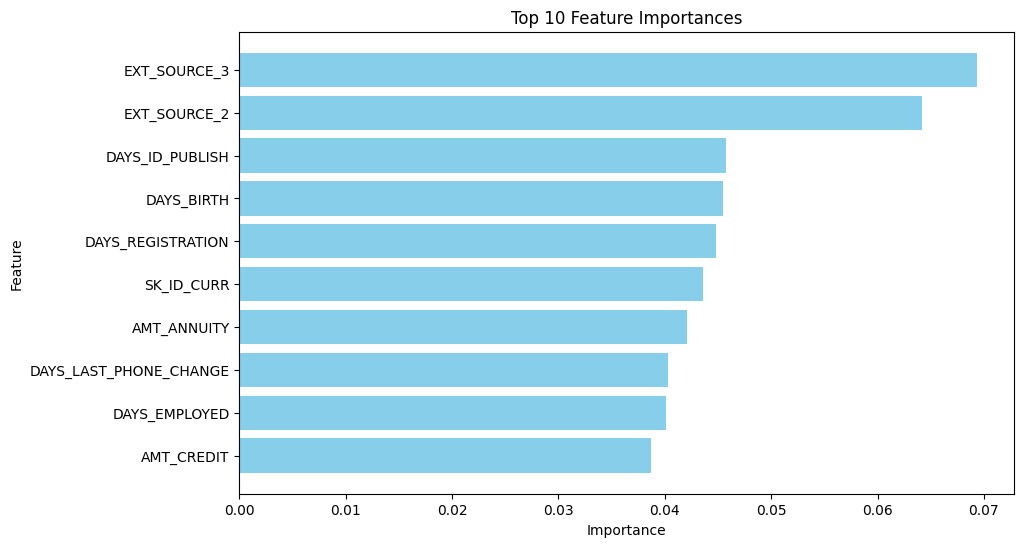

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

feature_importances = rf.feature_importances_

# Create a DataFrame with feature names and their importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by importance in descending order and get the top 10 features
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Print the top 10 features
print(top_features)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [ ]:
df = encoded_application_clean  # make a duplicate just in case

# Separate features and target variable
X = df.drop(columns=['TARGET'])  # Features
y = df['TARGET']                 # Target

# Standardize the features for Lasso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit Lasso Regression for feature selection
lasso = Lasso(alpha=0.001)  # higher alpha = stronger penalty
lasso.fit(X_train, y_train)

# Extract features with non-zero coefficients
selected_features = X.columns[lasso.coef_ != 0].tolist()

print("Selected Features by Lasso Regression:")
print(selected_features)
print("Number of selected features:", len(selected_features))

Selected Features by Lasso Regression:
['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_F', 'CODE_GENDER_M', 'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATI

In [ ]:
# Create a duplicate of the encoded DataFrame (optional, for safety)
df = encoded_application_clean.copy()

# Separate features and target variable
# Use PCA-transformed features instead of original features
X = X_pca_optimal  # PCA-transformed features from the previous cell
y = df['TARGET']   # Target variable

# Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Lasso Regression for feature selection on PCA-transformed data
lasso = Lasso(alpha=0.001)  # Regularization strength (higher alpha = stronger penalty)
lasso.fit(X_train, y_train)

# Extract indices of PCA components with non-zero coefficients
selected_pca_components = [i for i, coef in enumerate(lasso.coef_) if coef != 0]

print("Selected PCA Components by Lasso Regression:")
print(selected_pca_components)
print("Number of selected PCA components:", len(selected_pca_components))


Selected PCA Components by Lasso Regression:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Number of selected PCA components: 15


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Filter the training and testing sets to only include selected features
X_train_selected = X_train[:, lasso.coef_ != 0]
X_test_selected = X_test[:, lasso.coef_ != 0]

# Step 2: Train and evaluate Random Forest model using all features
rf_all_features = RandomForestClassifier(n_estimators=100, random_state=42)
rf_all_features.fit(X_train, y_train)

y_pred_all = rf_all_features.predict(X_test)
y_pred_proba_all = rf_all_features.predict_proba(X_test)[:, 1]

# Evaluate model with all features
accuracy_all = accuracy_score(y_test, y_pred_all)
f1_all = f1_score(y_test, y_pred_all)
roc_auc_all = roc_auc_score(y_test, y_pred_proba_all)

print("Random Forest Performance with All Features:")
print(f"Accuracy: {accuracy_all:.4f}")
print(f"F1 Score: {f1_all:.4f}")
print(f"ROC AUC Score: {roc_auc_all:.4f}")

# Step 3: Train and evaluate Random Forest model using only Lasso-selected features
rf_selected_features = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected_features.fit(X_train_selected, y_train)

y_pred_selected = rf_selected_features.predict(X_test_selected)
y_pred_proba_selected = rf_selected_features.predict_proba(X_test_selected)[:, 1]

# Evaluate model with Lasso-selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected)
roc_auc_selected = roc_auc_score(y_test, y_pred_proba_selected)

print("\nRandom Forest Performance with Lasso-Selected Features:")
print(f"Accuracy: {accuracy_selected:.4f}")
print(f"F1 Score: {f1_selected:.4f}")
print(f"ROC AUC Score: {roc_auc_selected:.4f}")

Random Forest Performance with All Features:
Accuracy: 0.9219
F1 Score: 0.0005
ROC AUC Score: 0.6868

Random Forest Performance with Lasso-Selected Features:
Accuracy: 0.9219
F1 Score: 0.0005
ROC AUC Score: 0.6868


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Use PCA-transformed features instead of the original features
X = X_pca_optimal  # PCA-transformed features from the previous PCA implementation
y = df['TARGET']   # Target variable

# Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Train and evaluate Random Forest model using all PCA-transformed features
rf_all_features = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_all_features.fit(X_train, y_train)

# Make predictions and calculate probabilities
y_pred_all = rf_all_features.predict(X_test)
y_pred_proba_all = rf_all_features.predict_proba(X_test)[:, 1]

# Evaluate model with all PCA components
accuracy_all = accuracy_score(y_test, y_pred_all)
f1_all = f1_score(y_test, y_pred_all)
roc_auc_all = roc_auc_score(y_test, y_pred_proba_all)

print("Random Forest Performance with All PCA Components:")
print(f"Accuracy: {accuracy_all:.4f}")
print(f"F1 Score: {f1_all:.4f}")
print(f"ROC AUC Score: {roc_auc_all:.4f}")

# Step 2: Train and evaluate Random Forest model using Lasso-selected PCA components
# Filter the training and testing sets to include only Lasso-selected components
X_train_selected = X_train[:, selected_pca_components]
X_test_selected = X_test[:, selected_pca_components]

rf_selected_features = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_selected_features.fit(X_train_selected, y_train)

# Make predictions and calculate probabilities
y_pred_selected = rf_selected_features.predict(X_test_selected)
y_pred_proba_selected = rf_selected_features.predict_proba(X_test_selected)[:, 1]

# Evaluate model with Lasso-selected PCA components
accuracy_selected = accuracy_score(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected)
roc_auc_selected = roc_auc_score(y_test, y_pred_proba_selected)

print("\nRandom Forest Performance with Lasso-Selected PCA Components:")
print(f"Accuracy: {accuracy_selected:.4f}")
print(f"F1 Score: {f1_selected:.4f}")
print(f"ROC AUC Score: {roc_auc_selected:.4f}")


Random Forest Performance with All PCA Components:
Accuracy: 0.9220
F1 Score: 0.0026
ROC AUC Score: 0.6925

Random Forest Performance with Lasso-Selected PCA Components:
Accuracy: 0.9220
F1 Score: 0.0026
ROC AUC Score: 0.6925


### previous_application.csv - ignore for now

In [ ]:
df_previous_application = pd.read_csv('previous_application.csv')
df_previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_previous_application[df_previous_application['SK_ID_CURR']==100003]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
575941,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
1021650,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
1223745,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
